2.8.0
1008

Denim : 648
Wool : 360


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

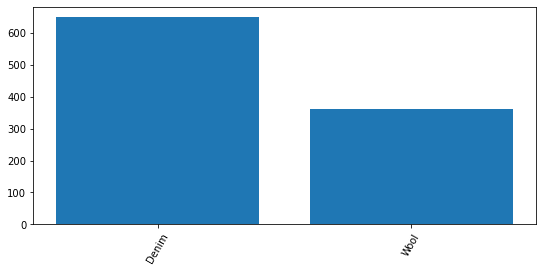

In [1]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re

print(tf.__version__)

import pathlib

path = "C:/Users/Startklar/Documents/Computer Science/Uni Year 3/Term 2/Individual Project/Farbic classification/Fabrics_simple"
data_dir = pathlib.Path(path)

subfiles = "/*/*.png"

image_count = len(list(data_dir.glob('*'+subfiles)))
print(str(image_count) + "\n")

Denim = list(data_dir.glob('Denim'+subfiles))
Wool = list(data_dir.glob('Wool'+subfiles))

fabrics = {'Denim' : Denim,
           'Wool' : Wool}

farbic_names = []
fabric_counts = []
for fabric in list(fabrics.keys()):
    farbic_names.append(fabric)
    fabric_counts.append(len(fabrics[fabric]))
    print(f"{fabric} : {len(fabrics[fabric])}")

fabric_dict = {
    'Fabric' : farbic_names,
    'Count' : fabric_counts
}
                  
import pandas as pd
import matplotlib.pyplot as plt

fabric_df = pd.DataFrame(fabric_dict)

plt.figure(figsize=(9,4))
plt.bar(x=fabric_df['Fabric'],
        height=fabric_df['Count'])
plt.xticks(rotation=60)

In [2]:
batch_size = 32
img_height = 400
img_width = 400
img_size = (img_height, img_width)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 1008 files belonging to 2 classes.
Using 807 files for training.
Found 1008 files belonging to 2 classes.
Using 201 files for validation.
['Denim', 'Wool']


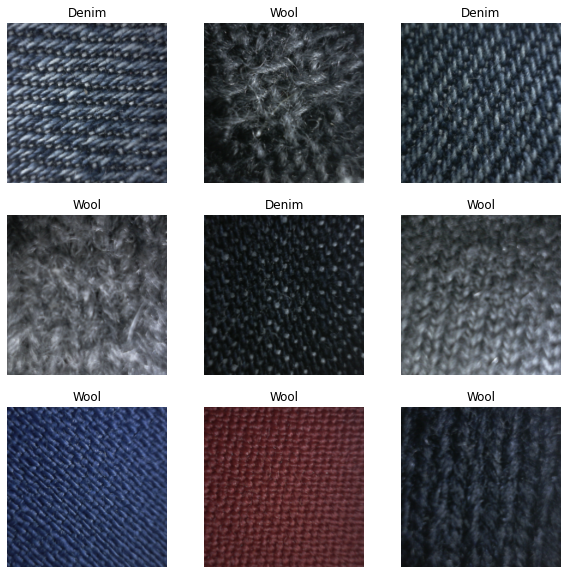

In [3]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

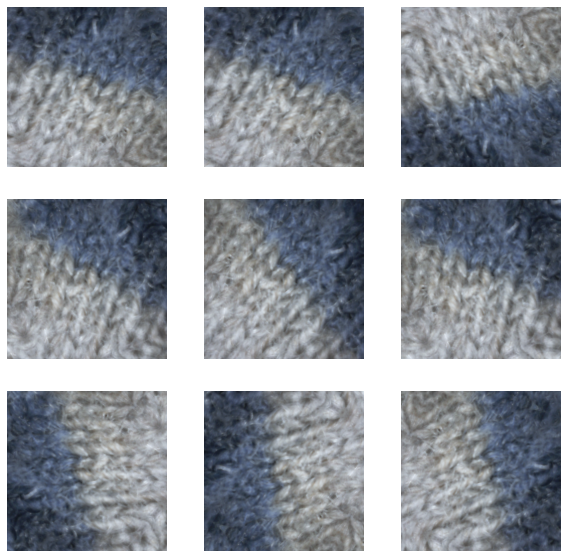

In [4]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomFlip("vertical"),
        tf.keras.layers.RandomRotation(0.5)
    ]
)

#visualize the effect of the augmentations on a sample image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#apply augmentation to the training data
#augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [5]:
#based of https://www.tensorflow.org/tutorials/load_data/images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#normalize the color chanels to be 0 <= x <= 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

(32, 400, 400, 3)
(32,)
0.003921569 1.0


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 2

model = tf.keras.Sequential([
  #apply augmentation to model
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=6
)

Epoch 1/6
26/26 [==============================] - 67s 2s/step - loss: 15.8303 - accuracy: 0.6320 - val_loss: 2.4281 - val_accuracy: 0.4925
Epoch 2/6
26/26 [==============================] - 62s 2s/step - loss: 2.9611 - accuracy: 0.6084 - val_loss: 2.6936 - val_accuracy: 0.7114
Epoch 3/6
26/26 [==============================] - 62s 2s/step - loss: 2.9869 - accuracy: 0.5960 - val_loss: 0.4962 - val_accuracy: 0.7761
Epoch 4/6
26/26 [==============================] - 67s 3s/step - loss: 0.6226 - accuracy: 0.7311 - val_loss: 0.6098 - val_accuracy: 0.6716
Epoch 5/6
26/26 [==============================] - 65s 3s/step - loss: 0.4991 - accuracy: 0.7807 - val_loss: 0.7099 - val_accuracy: 0.6169
Epoch 6/6
26/26 [==============================] - 66s 3s/step - loss: 0.4842 - accuracy: 0.7770 - val_loss: 0.4790 - val_accuracy: 0.7960


(201, 2)
(201,)
(201,)
[[112  28]
 [ 13  48]]


C:\Users\STARTK~1\AppData\Local\Temp/ipykernel_7580/2356982594.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
C:\Users\STARTK~1\AppData\Local\Temp/ipykernel_7580/2356982594.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


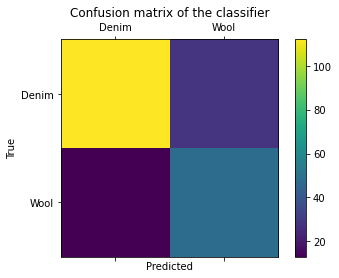

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = model.predict(val_ds)#X
predicted_categories = tf.argmax(y_pred, axis=1)#X
true_categories = tf.concat([y for x, y in val_ds], axis=0)#y

print(y_pred.shape)
print(predicted_categories.shape)
print(true_categories.shape)

cm = confusion_matrix(true_categories, predicted_categories)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names)
ax.set_yticklabels([''] + class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
#based of https://keras.io/examples/vision/image_classification_from_scratch/
imgSize = (img_height, img_width)
img = tf.keras.preprocessing.image.load_img(
    "C:/Users/Startklar/Documents/Computer Science/Uni Year 3/Term 2/Individual Project/Farbic classification/Fabrics_simple/Wool/7/im_1.png", target_size=imgSize
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

pred = model.predict(img_array)
print(np.round(pred[0:1], 2))
print(pred)
pred_val = np.argmax(pred,axis=1)
print(class_names)
print(f"This image is {pred_val}.")

[[ 3.72 20.95]]
[[ 3.7170608 20.948874 ]]
['Denim', 'Wool']
This image is [1].
